<a href="https://colab.research.google.com/github/BillHuynh/DataScienceProjects/blob/master/Web_scrapping_ARIMA_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Script uses selenium to web scrape data from google schoolar to predict any professor's number of citations using ARIMA time series 


In [ ]:
#setting up selenium on google colab
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',options=options)

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [62.2 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [ ]:

import pandas as pd
#copy any link on a professor on google scholar 
wd.get("https://scholar.google.com/citations?user=dqwjm-0AAAAJ&hl"+"=en#d=sc_md_hist")
#find years
data = []
box = wd.find_elements_by_class_name('gsc_g_t')
for a in box[0:19]:
  data.append(a.get_attribute('innerHTML'))
dfff = pd.DataFrame(data)
dfff.columns = ['Year']
#find citations
data2 = []
box2 = wd.find_elements_by_class_name('gsc_g_al')
for b in box2[0:19]:
  data2.append(b.get_attribute('innerHTML'))
dff = pd.DataFrame(data2)
dff.columns = ['citations']
# create csv
create_df = pd.concat([dfff, dff], axis=1)
create_df.to_csv('citation2003-2021.csv', encoding='utf-8', index=False )

In [ ]:
#install ARIMA 
!pip install "statsmodels==0.11.1"

     |████████████████████████████████| 8.7MB 16.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# split the data into train (year 2003 to 2017) and test
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA

# load dataset
series = create_df["citations"]

# split into train and test sets
X = series.values
X = X.astype('float32')
size = len(X) - 4
train, test = X[0:size], X[size:-1]

# fit an ARIMA model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
# forecast
result = model_fit.get_forecast(steps=3)
#95% CI for 2018,2019,2020
CIlower0 = result.predicted_mean[0]-1.96*result.se_mean[0]
CIupper0 = result.predicted_mean[0]+1.96*result.se_mean[0]
CIlower1 = result.predicted_mean[1]-1.96*result.se_mean[1]
CIlupper1 = result.predicted_mean[1]+1.96*result.se_mean[1]
CIlower2 = result.predicted_mean[2]-1.96*result.se_mean[2]
CIlupper2 = result.predicted_mean[2]+1.96*result.se_mean[2]

# summarize forecast and confidence intervals
print('Forcast2018: %.3f' % result.predicted_mean[0])
print('Forcast2019: %.3f' % result.predicted_mean[1])
print('Forcast2020: %.3f' % result.predicted_mean[2])
#SE for 2018,2019,2020
print('Standard Error2018: %.3f' % result.se_mean[0])
print('Standard Error2019: %.3f' % result.se_mean[1])
print('Standard Error2020: %.3f' % result.se_mean[2])
# true values for 2018,2019,2020
print('Expected2018: %.3f' % test[0])
print('Expected2019: %.3f' % test[1])
print('Expected2020: %.3f' % test[2])
#95% CI for 2018,2019,2020
print('95%% Interval2018: %.3f to %.3f' % (CIlower0, CIupper0))
print('95%% Interval2019: %.3f to %.3f' % (CIlower1, CIlupper1))
print('95%% Interval2020: %.3f to %.3f' % (CIlower2, CIlupper2))

Forcast2018: 426.489
Forcast2019: 465.761
Forcast2020: 502.932
Standard Error2018: 20.340
Standard Error2019: 36.150
Standard Error2020: 53.119
Expected2018: 453.000
Expected2019: 580.000
Expected2020: 831.000
95% Interval2018: 386.623 to 466.355
95% Interval2019: 394.906 to 536.615
95% Interval2020: 398.818 to 607.046


In [ ]:
# Print the error below by comparing the test and preds:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
predicted20182020 = [result.predicted_mean[0], result.predicted_mean[1],result.predicted_mean[2]]
true20182020 = [test[0],test[1],test[2]]
# Your code to show the performance RMSE
rmse = sqrt(mean_squared_error(predicted20182020,true20182020 ))
print(rmse)

201.14823171373936


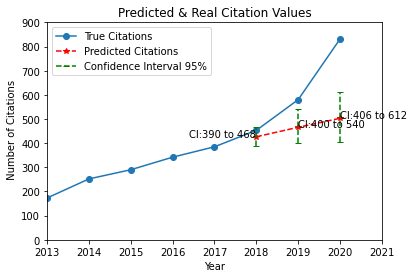

In [ ]:
# You code: Visualize as required, the prediction with its confidence interval
import matplotlib.pyplot as plt
values20132017 = X[10:-1]
values20132017x = create_df.Year.values[10:-1]
axisX = create_df.Year.values[10:-1]
plt.plot([2013,2014,2015,2016,2017,2018,2019,2020], [X[10],X[11],X[12],X[13],X[14],X[15],X[16],X[17]],marker='o', label = "True Citations")
plt.plot([2018,2019,2020], predicted20182020, linestyle='--', marker='*', color='r', label = "Predicted Citations")
plt.axis([2013,2021,0,900])
plt.text(2018,predicted20182020[0],'CI:390 to 468', horizontalalignment='right')
plt.text(2019,predicted20182020[1],'CI:400 to 540')
plt.text(2020,predicted20182020[2],'CI:406 to 612')
plt.plot([2018,2018], [390,468], linestyle='--', marker='_', color='g', label = "Confidence Interval 95%")
plt.plot([2019,2019], [400,540], linestyle='--', marker='_', color='g')
plt.plot([2020,2020], [406,612], linestyle='--', marker='_', color='g')
plt.legend()
plt.xlabel('Year')
plt.ylabel(' Number of Citations')
plt.title('Predicted & Real Citation Values')
plt.show()

In [ ]:
# your code to run grid search
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
series = read_csv('citation2003-2021.csv', header=0, index_col=0, squeeze=True)

# split into train and test sets
X = series.values
X = X.astype('float32')
size = len(X) - 4
train, test = X[0:size], X[size:-1]
history = [x for x in train]
predictions = list()
RSME = []
PARAMETER = []
p=[1,2]
q=[1,2]
d=[1,2]

# walk-forward validation
for i1 in p:
  for i2 in q:
    for i3 in d:
      for t in range(len(test)):
	      model = ARIMA(history, order=(i1,i3,i2))
	      model_fit = model.fit()
	      output = model_fit.forecast()
	      yhat = output[0]
	      predictions.append(yhat)
	      obs = test[t]
	      history.append(obs)
	      #print('predicted=%f, expected=%f' % (yhat, obs)) Very useful thanks! 
      rmse = sqrt(mean_squared_error(test, predictions))
      history = [x for x in train]
      predictions = list()  
      RSME.append(rmse)
      PARAMETER.append(str(i1)+" "+str(i2)+" "+str(i3))
      print('Test RMSE: %.3f' % rmse,i1,i2,i3) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Test RMSE: 100.076 1 1 1
Test RMSE: 94.768 1 1 2
Test RMSE: 100.642 1 2 1
Test RMSE: 96.588 1 2 2
Test RMSE: 91.889 2 1 1
Test RMSE: 105.847 2 1 2
Test RMSE: 101.751 2 2 1
Test RMSE: 104.219 2 2 2


In [ ]:
Results = pd.DataFrame({'RMSE':RSME,'Parameter':PARAMETER})
print(Results.head(6))
print("lowest RMSE")
print(Results.loc[Results['RMSE'].argmin()])
Results.to_csv('search-results.csv', encoding='utf-8', index=False )

         RMSE Parameter
0  100.075746     1 1 1
1   94.767923     1 1 2
2  100.642059     1 2 1
3   96.587520     1 2 2
4   91.889087     2 1 1
5  105.846888     2 1 2
lowest RMSE
RMSE         91.8891
Parameter      2 1 1
Name: 4, dtype: object


In [ ]:
# your code to perform the Arima train on data 2003 to 2020
#train = create_df.citation_all.values[:-1]
series = create_df.citations.values[:-1]
# split into train and test sets
X = series
X = X.astype('float32')
size = len(X) 
train = X[0:size]

# fit an ARIMA model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Your code to predict for 2021 and 2022
# forecast
result = model_fit.get_forecast(steps=2)

CIlower0 = result.predicted_mean[0]-1.96*result.se_mean[0]
CIupper0 = result.predicted_mean[0]+1.96*result.se_mean[0]
CIlower1 = result.predicted_mean[1]-1.96*result.se_mean[1]
CIlupper2 = result.predicted_mean[1]+1.96*result.se_mean[1]

# summarize forecast and confidence intervals
print('Forcast2021: %.3f' % result.predicted_mean[0])
print('Forcast2022: %.3f' % result.predicted_mean[1])

print('Standard Error: %.3f' % result.se_mean[0])
print('Standard Error: %.3f' % result.se_mean[1])

print('95%% Interval: %.3f to %.3f' % (CIlower0, CIupper0))
print('95%% Interval: %.3f to %.3f' % (CIlower1, CIlupper2))

Forcast2021: 1103.232
Forcast2022: 1359.881
Standard Error: 39.274
Standard Error: 96.795
95% Interval: 1026.256 to 1180.208
95% Interval: 1170.163 to 1549.599


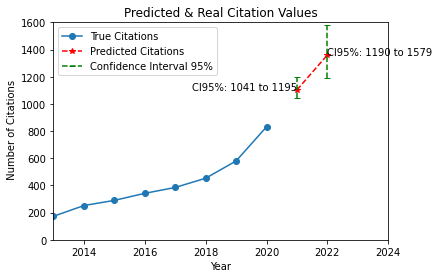

In [ ]:
# Plot the points and the prediction with its confidence interval
import matplotlib.pyplot as plt
plt.plot([2013,2014,2015,2016,2017,2018,2019,2020], [X[10],X[11],X[12],X[13],X[14],X[15],X[16],X[17]],marker='o', label = "True Citations" )
plt.plot([2021,2022], [result.predicted_mean[0],result.predicted_mean[1]], linestyle='--', marker='*', color='r', label = "Predicted Citations" )
plt.axis([2013,2024,0,1600])
plt.text(2021,result.predicted_mean[0],'CI95%: 1041 to 1195', horizontalalignment='right')
plt.text(2022,result.predicted_mean[1],'CI95%: 1190 to 1579')
plt.plot([2021,2021], [1041,1195], linestyle='--', marker='_', color='g',label = "Confidence Interval 95%")
plt.plot([2022,2022], [1190,1579], linestyle='--', marker='_', color='g')
plt.xlabel('Year')
plt.ylabel(' Number of Citations')
plt.title('Predicted & Real Citation Values')
plt.legend()
